In [1]:
# installing libraries
!pip install pandas

In [3]:
!pip install numpy

In [7]:
!pip install missingno

In [9]:
!pip install matplotlib

In [11]:
!pip install seaborn

In [13]:
!pip install plotly

In [59]:
# importing libraries
import pandas as pd
import numpy as np
import missingno as msno
import re
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import seaborn as sns

In [209]:
from plotly.subplots import make_subplots
from matplotlib import ticker
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [63]:
pwd

'C:\\Users\\sindh'

In [65]:
# Load data
df = pd.read_csv(r"C:\Users\sindh\Downloads\Amazon Sale Report.csv", low_memory = False) 

In [66]:
# Display the first 5 lines of the dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [69]:
# Check the dimension of the data
df_sizes = {'start': df.shape}

In [71]:
print(f"Raw data contains {df_sizes['start'][0]} records and {df_sizes['start'][1]} columns.")

Raw data contains 128975 records and 24 columns.


In [73]:
# Standardize the column names
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [75]:
df = df.rename(columns= {'Order ID': 'Order_ID',
                         'Sales Channel ': 'Sales_channel',
                         'ship-service-level': 'ship_service_level', 
                         'ship-city': 'ship_city', 
                         'ship-state': 'ship_state', 
                         'ship-postal-code': 'ship_postal_code', 
                         'ship-country': 'ship_country', 
                         'promotion-ids': 'promotion_ids',
                         'Courier Status': 'Courier_Status', 
                         'currency': 'Currency', 
                         'fulfilled-by':'fulfilled_by'})
    

In [77]:
# check columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order_ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales_channel       128975 non-null  object 
 6   ship_service_level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier_Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  Currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [79]:
# set the column 'index' as index of dataframe. With this operation the number of columns becomes 22.
df.set_index('index', inplace = True)

In [81]:
# Evaluate how many values are missing
def missing_evaluation(dataframe):
    '''
    missing_evaluation(dataframe)
    
    Returns a dataframe containing the informations about missing and unique values 
    for each column on a dataframe passed as a parameter

    Parameters: 
    dataframe: dataframe to analyze
    '''
    
    # Column 'qt_missing': Number of NaN values
    df_missing_stats = pd.DataFrame(data=dataframe.isna().sum(), index=dataframe.columns, columns=['qt_missing'])
    # Column 'nr_unique_values': Number of unique values
    df_missing_stats['qt_unique_values'] = pd.DataFrame(data=dataframe.nunique(), index=dataframe.columns)
    # Column 'unique_values': unique values of the attributes
    df_missing_stats['unique_values'] = pd.DataFrame(data=dataframe.apply(pd.unique), index=dataframe.columns)
    # Column 'perc_missing': percentage of missing values
    df_missing_stats['perc_missing'] = pd.DataFrame(data=dataframe.isnull().mean())
    return df_missing_stats

In [83]:
df_missing_stats = missing_evaluation(df)
df_missing_stats

,qt_missing,qt_unique_values,unique_values,perc_missing
Order_ID,0,120378,"[405-8078784-5731545, 171-9198151-1101146, 404...",0.000000
Date,0,91,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...",0.000000
Status,0,13,"[Cancelled, Shipped - Delivered to Buyer, Ship...",0.000000
Fulfilment,0,2,"[Merchant, Amazon]",0.000000
Sales_channel,0,2,"[Amazon.in, Non-Amazon]",0.000000
ship_service_level,0,2,"[Standard, Expedited]",0.000000
Style,0,1377,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET...",0.000000
SKU,0,7195,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...",0.000000
Category,0,9,"[Set, kurta, Western Dress, Top, Ethnic Dress,...",0.000000
Size,0,11,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]",0.000000


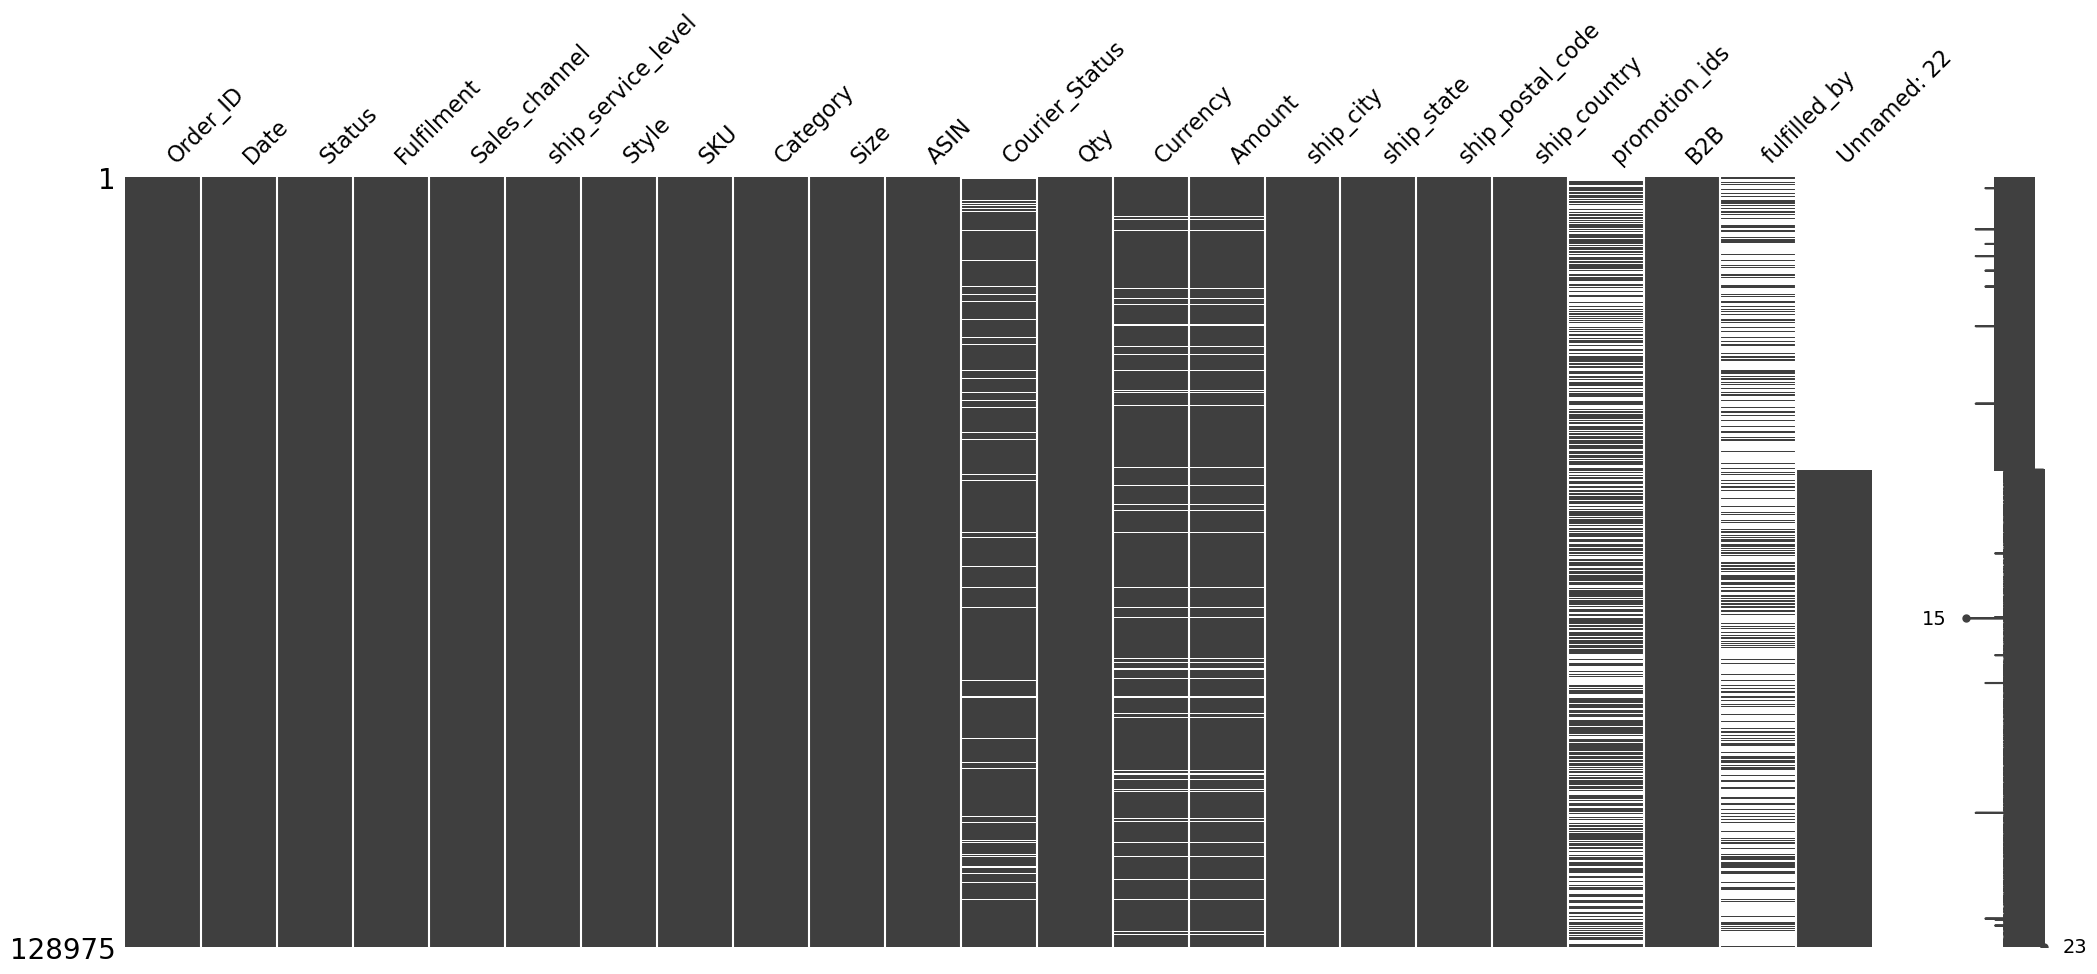

In [85]:
# Visualize the distribution of missing values with missingno matrix
msno.matrix(df);

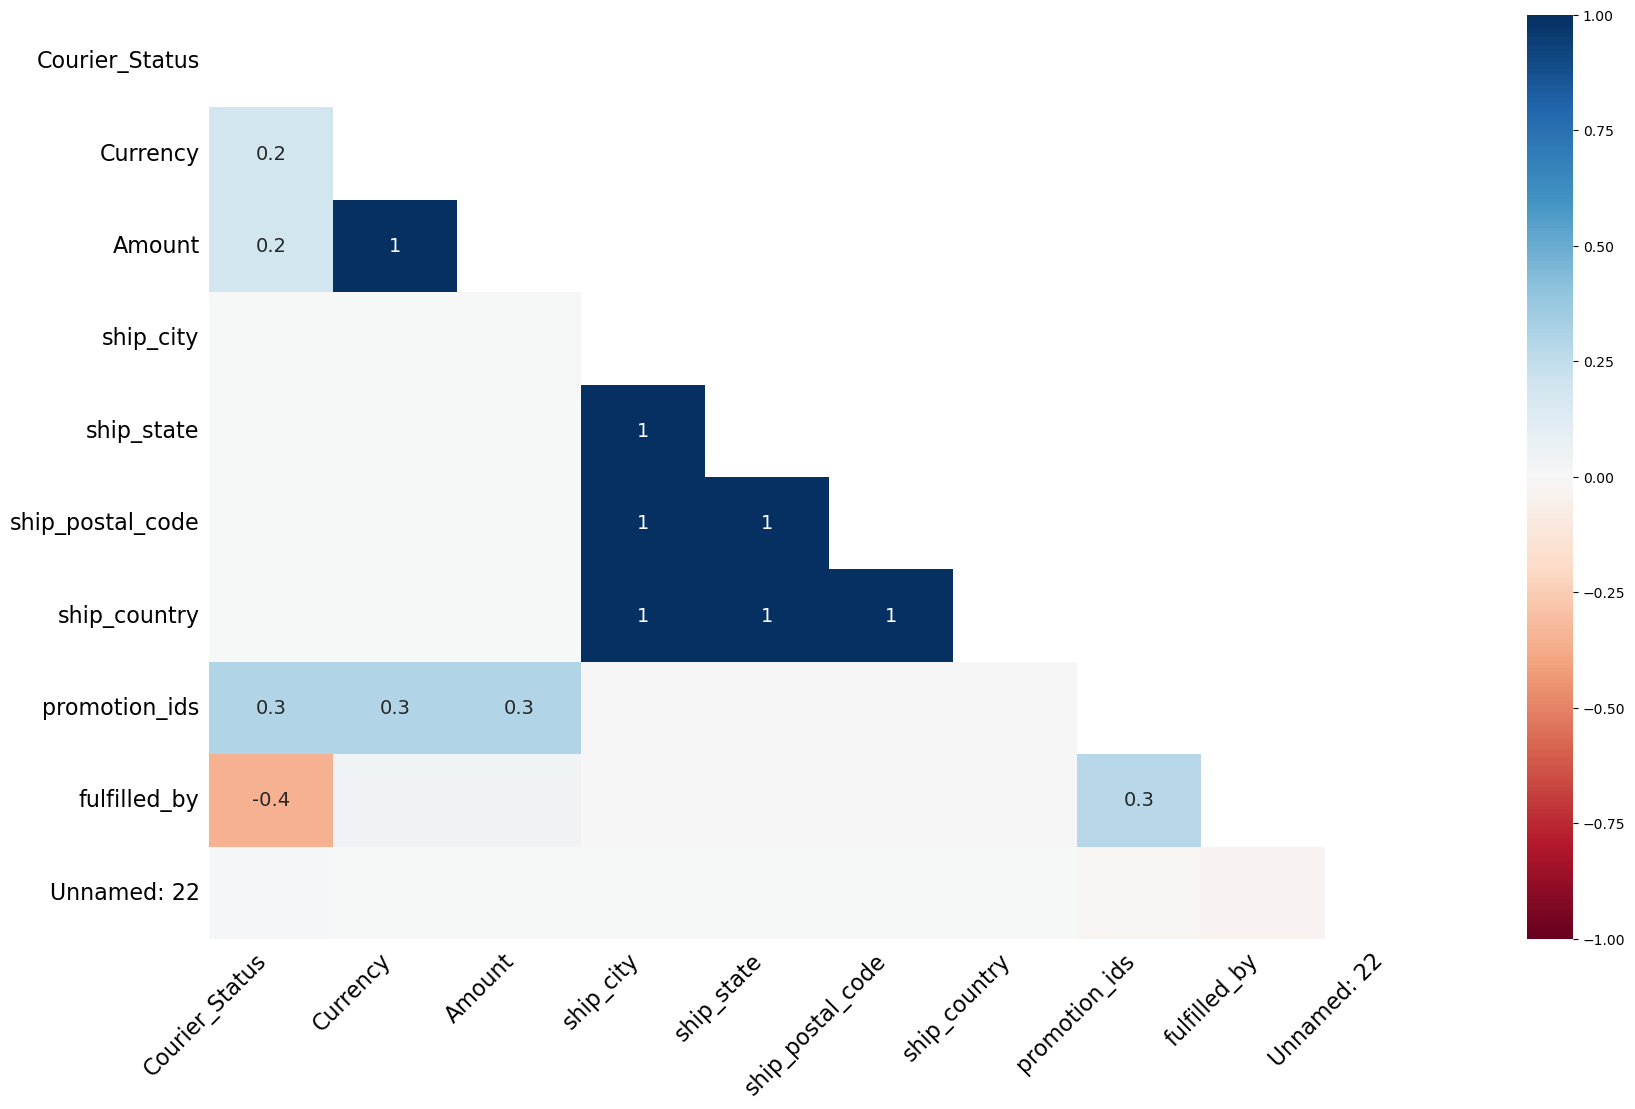

In [87]:
# Use the heatmap to identify correlations of the nullity between each of the different columns.
msno.heatmap(df);

In [91]:
# Replace NaN values in column 'Courier_Status' with the value 'Unknown'
df['Courier_Status'] = df['Courier_Status'].fillna('Unknown')

In [93]:
set_idx_amount_null = set(df[df['Amount'].isnull()].index)

In [95]:
set2_idx_currency_null = set(df[df['Currency'].isnull()].index)

In [97]:
print(f"Question: Columns 'Amount' and 'Currency' have 1 to 1 nullity correlation?\nAnswer: {set_idx_amount_null == set2_idx_currency_null}") 

Question: Columns 'Amount' and 'Currency' have 1 to 1 nullity correlation?
Answer: True


In [101]:
df['Amount'] = df['Amount'].fillna(0)

In [105]:
df['Currency'] = df['Currency'].fillna('INR')

In [109]:
# Replace NaN values in column 'promotion_ids' with the value 'Unknown'
df['promotion_ids'] = df['promotion_ids'].fillna('No Promo')

In [113]:
df['ship_city'] = df['ship_city'].fillna('Unknown')
df['ship_state'] = df['ship_state'].fillna('Unknown')
df['ship_postal_code'] = df['ship_postal_code'].fillna(0)
df['ship_country'] = df['ship_country'].fillna('Unknown')

In [117]:
df['fulfilled_by'] = df['fulfilled_by'].fillna('FBA')

In [123]:
# Check if 'Unnamed: 22' exists before trying to drop it
if 'Unnamed: 22' in df.columns:
    df.drop(columns=['Unnamed: 22'], inplace=True)
else:
    print("'Unnamed: 22' not found in columns")

'Unnamed: 22' not found in columns


In [129]:
df.isna().sum().sum()

0

In [131]:
df_missing_stats = missing_evaluation(df)
df_missing_stats

,qt_missing,qt_unique_values,unique_values,perc_missing
Order_ID,0,120378,"[405-8078784-5731545, 171-9198151-1101146, 404...",0.0
Date,0,91,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...",0.0
Status,0,13,"[Cancelled, Shipped - Delivered to Buyer, Ship...",0.0
Fulfilment,0,2,"[Merchant, Amazon]",0.0
Sales_channel,0,2,"[Amazon.in, Non-Amazon]",0.0
ship_service_level,0,2,"[Standard, Expedited]",0.0
Style,0,1377,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET...",0.0
SKU,0,7195,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...",0.0
Category,0,9,"[Set, kurta, Western Dress, Top, Ethnic Dress,...",0.0
Size,0,11,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]",0.0


In [133]:
df['Order_ID'] = df['Order_ID'].str.strip()

In [135]:
df['Order_ID'] = df['Order_ID'].str.upper()

In [139]:
# Set column 'Date' to data type datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [141]:
df['Status'] = df['Status'].str.strip()

In [143]:
# Check column 'Status', result: it doesn't need intervention
for value in df.Status.sort_values().unique():
    print(f"'{value}'")

'Cancelled'
'Pending'
'Pending - Waiting for Pick Up'
'Shipped'
'Shipped - Damaged'
'Shipped - Delivered to Buyer'
'Shipped - Lost in Transit'
'Shipped - Out for Delivery'
'Shipped - Picked Up'
'Shipped - Rejected by Buyer'
'Shipped - Returned to Seller'
'Shipped - Returning to Seller'
'Shipping'


In [145]:
df['Style'] = df['Style'].str.strip()
df['Style'] = df['Style'].str.upper()
df['SKU'] = df['SKU'].str.strip()
df['SKU'] = df['SKU'].str.upper()

In [147]:
df['Category'] = df['Category'].str.strip()
df['Category'] = df['Category'].str.upper()

In [149]:
df['ASIN'] = df['ASIN'].str.strip()
df['ASIN'] = df['ASIN'].str.upper()

In [151]:
df['ship_city'] = df['ship_city'].str.strip()
df['ship_city'] = df['ship_city'].str.upper()
df['ship_state'] = df['ship_state'].str.strip()
df['ship_state'] = df['ship_state'].str.upper()

In [153]:
df.loc[df['ship_state'].isin(['AR']),'ship_state'] = 'ARUNACHAL PRADESH'
df.loc[df['ship_state'].isin(['NEW DELHI']),'ship_state'] = 'DELHI'
df.loc[df['ship_state'].isin(['NL']),'ship_state'] = 'NAGALAND'
df.loc[df['ship_state'].isin(['ORISSA']),'ship_state'] = 'ODISHA'
df.loc[df['ship_state'].isin(['PONDICHERRY']),'ship_state'] = 'PUDUCHERRY'
df.loc[df['ship_state'].isin(['PUNJAB/MOHALI/ZIRAKPUR','PB']),'ship_state'] = 'PUNJAB'
df.loc[df['ship_state'].isin(['RAJSHTHAN','RAJSTHAN','RJ']),'ship_state'] = 'RAJASTHAN'

In [155]:
df['ship_city'] = df['ship_city'].replace(['PUDUCHERRY','PONDYCHERRY', 'PUDUCHERRY 605001', 'PUDUCHERRY 605003'],'PUDUCHERRY')

In [157]:
df['ship_city'] = df['ship_city'].replace(['NORTH DELHI', 'NORTH WEST DELHI','NEW DELHI (NORTH)'],'NEW DELHI (NORTH)')
df['ship_city'] = df['ship_city'].replace(['SOUTH  DELHI', 'SOUTH DELHI'],'NEW DELHI (SOUTH)')
df['ship_city'] = df['ship_city'].replace(['SOUTH EAST DELHI'],'NEW DELHI (SOUTH EAST)')
df['ship_city'] = df['ship_city'].replace(['SOUTH WEST DELHI','SOUTH-WEST DELHI'],'NEW DELHI (SOUTH WEST)')
df['ship_city'] = df['ship_city'].replace(['WEST DELHI'],'NEW DELHI (WEST)')
df['ship_city'] = df['ship_city'].replace(['CENTRAL DELHI','CITY'],'NEW DELHI (CENTRAL)')
df['ship_city'] = df['ship_city'].replace(['EAST DELHI'],'NEW DELHI (EAST)')

In [159]:
pattern = r'^NEW DELHI(?!.*\()'
df['ship_city'] = df['ship_city'].apply(lambda x: "NEW DELHI" if re.match(pattern, x) else x)

In [161]:
df['ship_city'] = df['ship_city'].replace(['N.DELHI','NEW DELH','DELHI','DELHI -86','DELHI 110085','DELHI CANTT','DELHI-92.','DELHIQ', 'NEW-DELHI',
 'NEWDELHI'],'NEW DELHI')

In [163]:
pattern = r'^BANGALOR(?!.*\()'
df['ship_city'] = df['ship_city'].apply(lambda x: 'BANGALORE' if re.match(pattern, x) else x)
df['ship_city'] = df['ship_city'].apply(lambda x: 'BANGALORE' if re.match(r'^BENGALUR(?!.*\()', x) else x)
df['ship_city'] = df['ship_city'].replace(['BENGALOORU','BENGOLOOR', 'BANGALURU'],'BANGALORE')

In [165]:
df['ship_postal_code'] = df['ship_postal_code'].astype(str)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order_ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales_channel       128975 non-null  object        
 5   ship_service_level  128975 non-null  object        
 6   Style               128975 non-null  object        
 7   SKU                 128975 non-null  object        
 8   Category            128975 non-null  object        
 9   Size                128975 non-null  object        
 10  ASIN                128975 non-null  object        
 11  Courier_Status      128975 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  Currency            128975 non-nul

In [169]:
df['promotion_ids'] = df['promotion_ids'].str.strip()
df['promotion_ids'] = df['promotion_ids'].str.upper()

In [171]:
df.drop_duplicates(inplace = True)

In [173]:
print(f"""
Question: When the value in column 'Fulfilment' is 'Merchant', the value in column 'fulfilled_by' is 'Easy Ship'?
Answer:   {set(df.query("Fulfilment == 'Merchant'").index) == set(df.query("fulfilled_by == 'Easy Ship'").index)}""") 
print(f"""
Question: When the value in column 'Fulfilment' is 'Amazon', the value in column 'fulfilled_by' is 'FBA'?
Answer:   {set(df.query("Fulfilment == 'Merchant'").index) == set(df.query("fulfilled_by == 'Easy Ship'").index)}""") 


Question: When the value in column 'Fulfilment' is 'Merchant', the value in column 'fulfilled_by' is 'Easy Ship'?
Answer:   True

Question: When the value in column 'Fulfilment' is 'Amazon', the value in column 'fulfilled_by' is 'FBA'?
Answer:   True


In [175]:
df.drop(columns = ['fulfilled_by'], inplace = True)

In [185]:
# only numerical Attributes (including Date)
# Convert datetime column to numeric temporarily using astype
df['Date_numeric'] = df['Date'].astype('int64')

# Use describe on the DataFrame with the numeric date column
numeric_description = df.describe()

# Drop the temporary numeric column
df.drop(columns=['Date_numeric'], inplace=True)

# Display the description
print(numeric_description)

                                Date           Qty         Amount  \
count                         128969  128969.00000  128969.000000   
mean   2022-05-12 11:50:02.758802176       0.90445     609.371580   
min              2022-03-31 00:00:00       0.00000       0.000000   
25%              2022-04-20 00:00:00       1.00000     413.000000   
50%              2022-05-10 00:00:00       1.00000     583.000000   
75%              2022-06-04 00:00:00       1.00000     771.000000   
max              2022-06-29 00:00:00      15.00000    5584.000000   
std                              NaN       0.31333     313.335444   

       Date_numeric  
count  1.289690e+05  
mean   1.652356e+18  
min    1.648685e+18  
25%    1.650413e+18  
50%    1.652141e+18  
75%    1.654301e+18  
max    1.656461e+18  
std    2.226622e+15  


In [187]:
df['Date'].max() - df['Date'].min()

Timedelta('90 days 00:00:00')

In [189]:
df.describe(include='O').T # only numpy.object data type Categorical Data

,count,unique,top,freq
Order_ID,128969,120378,403-4984515-8861958,12
Status,128969,13,Shipped,77801
Fulfilment,128969,2,Amazon,89692
Sales_channel,128969,2,Amazon.in,128845
ship_service_level,128969,2,Expedited,88609
Style,128969,1377,JNE3797,4224
SKU,128969,7195,JNE3797-KR-L,773
Category,128969,9,SET,50281
Size,128969,11,M,22709
ASIN,128969,7190,B09SDXFFQ1,773


In [191]:
df['month'] = df['Date'].dt.month
df['month'].unique()

array([4, 3, 5, 6])

In [195]:
df['month'] = df['month'].replace([3, 4, 5, 6], ['March', 'April', 'May', 'June'])

In [199]:
df.to_csv(r"C:\Users\sindh\Downloads\Amazon Sale Report.csv")

In [201]:
# Which categories have sold most?
df_q1 = df[['Amount', 'Qty']].groupby(df['Category']).sum()\
                                .sort_values('Amount', ascending=False)\
                                .reset_index()
df_q1

,Category,Amount,Qty
0,SET,39202022.03,45287
1,KURTA,21299013.70,45044
2,WESTERN DRESS,11216072.69,13943
3,TOP,5347792.30,9903
4,ETHNIC DRESS,791217.66,1053
5,BLOUSE,458408.18,863
6,BOTTOM,150667.98,398
7,SAREE,123933.76,152
8,DUPATTA,915.00,3


In [203]:
# define font sizes
_title_size = 18
_axis_label_size = 12
_label_size = 10
_axis_label_pad = 10
_legend_title_size = 12
_legend_content_size = 12
_padding_title = 20
_fweight = 'normal'

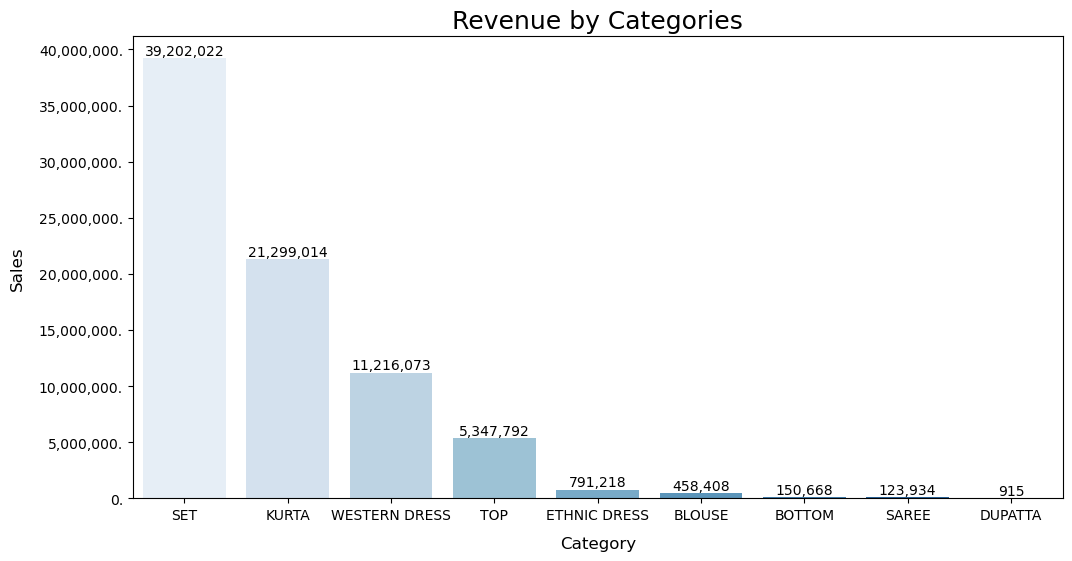

In [215]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

# Create directory if it doesn't exist
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot the bar chart
plt.figure(figsize=(12, 6))
unique_categories = df_q1['Category'].nunique()
palette = sns.color_palette("Blues", unique_categories)

ax_q1 = sns.barplot(y='Amount', x='Category', hue='Category', palette=palette, data=df_q1, dodge=False, legend=False)
plt.title('Revenue by Categories', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}.")
ax_q1.yaxis.set_major_formatter(formatter)
ax_q1.xaxis.labelpad = _axis_label_pad
ax_q1.yaxis.labelpad = _axis_label_pad

for bar in ax_q1.patches:
    height = bar.get_height()
    ax_q1.text(bar.get_x() + bar.get_width() / 2., height,
               '{:,.0f}'.format(height), ha='center', va='bottom')

plt.xlabel("Category", weight=_fweight, fontsize=_axis_label_size)
plt.ylabel("Sales", weight=_fweight, fontsize=_axis_label_size)

# Save the plot
plt.savefig(os.path.join(output_dir, 'Revenue_by_categories.jpg'), dpi=300)
plt.show()

In [217]:
df_q2 = df.groupby(['Category', 'ASIN'])[['Qty','Amount']].sum()\
                                     .sort_values('Qty', ascending=False)\
                                     .head(20)\
                                     .reset_index()
df_q2

,Category,ASIN,Qty,Amount
0,WESTERN DRESS,B09SDXFFQ1,661,524581.77
1,WESTERN DRESS,B09SDY8DCT,561,454290.16
2,WESTERN DRESS,B09SDYQ3WG,503,407302.57
3,KURTA,B081WSCKPQ,485,194645.29
4,SET,B08XNJG8B1,467,526536.20
5,SET,B08XNJ19QH,421,479937.14
6,WESTERN DRESS,B09SDXRYBG,415,332155.24
7,KURTA,B081WX4G4Q,399,169808.87
8,WESTERN DRESS,B09SDY9SQ6,386,303616.70
9,SET,B08XQBF1G4,373,284058.96


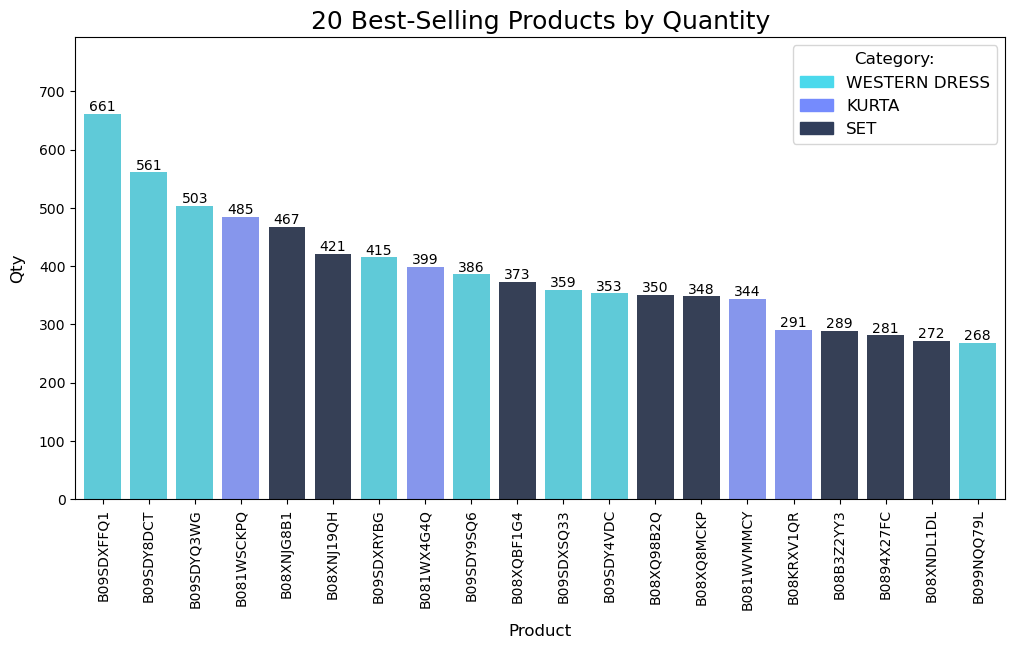

In [221]:
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

# Create a directory if it doesn't exist
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define color dictionary
colors_dict = {'WESTERN DRESS': '#4BD9EC', 'KURTA': '#758BFD', 'SET': '#313E5B'} 

# Create a list of colors based on the category
col_list = [colors_dict.get(cat) for cat in df_q2['Category']]

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax_q2 = sns.barplot(y='Qty', x='ASIN', hue='Category', palette=colors_dict, data=df_q2, dodge=False, legend=False)
plt.title('20 Best-Selling Products by Quantity', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q2.yaxis.set_major_formatter(formatter)
ax_q2.xaxis.labelpad = _axis_label_pad
ax_q2.yaxis.labelpad = _axis_label_pad
ax_q2.margins(0.01, 0.2)

for bar in ax_q2.patches:
    height = bar.get_height()
    ax_q2.text(bar.get_x() + bar.get_width() / 2., height,
               '{:,.0f}'.format(height), ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')
plt.xlabel("Product", weight=_fweight, fontsize=_axis_label_size)
plt.ylabel("Qty", weight=_fweight, fontsize=_axis_label_size)

# Create the legend
legend_entries = [mpatches.Patch(color=color, label=label) for label, color in colors_dict.items()]
plt.legend(handles=legend_entries, title='Category:', title_fontsize=_legend_title_size, fontsize=_legend_content_size)

# Save the plot
plt.savefig(os.path.join(output_dir, '20_Best_Selling_Products_by_Quantity.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [223]:
df_q3 = df.groupby(['Category', 'ASIN'])[['Amount', 'Qty']].sum()\
                                     .sort_values('Amount', ascending=False)\
                                     .head(20)\
                                     .reset_index()
df_q3

,Category,ASIN,Amount,Qty
0,SET,B08XNJG8B1,526536.20,467
1,WESTERN DRESS,B09SDXFFQ1,524581.77,661
2,SET,B08XNJ19QH,479937.14,421
3,WESTERN DRESS,B09SDY8DCT,454290.16,561
4,WESTERN DRESS,B09SDYQ3WG,407302.57,503
5,WESTERN DRESS,B09SDXRYBG,332155.24,415
6,SET,B08XNDL1DL,305616.95,272
7,WESTERN DRESS,B09SDY9SQ6,303616.70,386
8,SET,B08XQBF1G4,284058.96,373
9,WESTERN DRESS,B09SDY4VDC,276375.80,353


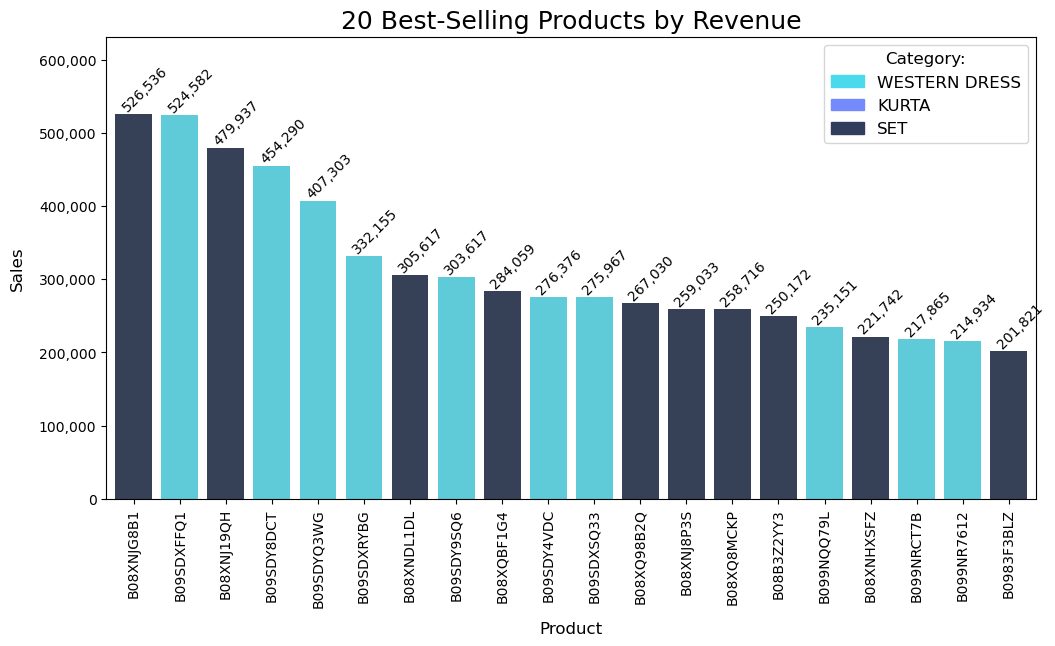

In [227]:
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

# Define the directory and create it if it doesn't exist
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define color dictionary
colors_dict = {'WESTERN DRESS': '#4BD9EC', 'KURTA': '#758BFD', 'SET': '#313E5B'} 

# Create a list of colors based on the category
col_list = [colors_dict.get(cat) for cat in df_q3['Category']]

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax_q3 = sns.barplot(y='Amount', x='ASIN', hue='Category', palette=colors_dict, data=df_q3, dodge=False, legend=False)
plt.title('20 Best-Selling Products by Revenue', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q3.yaxis.set_major_formatter(formatter)
ax_q3.xaxis.labelpad = _axis_label_pad
ax_q3.yaxis.labelpad = _axis_label_pad

for bar in ax_q3.patches:
    height = bar.get_height()
    ax_q3.text(bar.get_x() + bar.get_width() * 0.8, height,
               '{:,.0f}'.format(height), ha='center', va='bottom', rotation=45)
    
plt.xticks(rotation=90, ha='center')
plt.xlabel("Product", weight=_fweight, fontsize=_axis_label_size)
plt.ylabel("Sales", weight=_fweight, fontsize=_axis_label_size)

# Create the legend
legend_entries = [mpatches.Patch(color=color, label=label) for label, color in colors_dict.items()]
plt.legend(handles=legend_entries, title='Category:', title_fontsize=_legend_title_size, fontsize=_legend_content_size)

ax_q3.margins(0.01, 0.2)

# Save the plot
plt.savefig(os.path.join(output_dir, '20_Best_Selling_Products_by_Revenue.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [229]:
df_q4 = df.groupby(['ship_state','ship_city'])[['Order_ID']].count()\
                                    .sort_values('Order_ID', ascending=False)\
                                    .head(20)\
                                    .reset_index()
df_q4

,ship_state,ship_city,Order_ID
0,KARNATAKA,BANGALORE,13342
1,TELANGANA,HYDERABAD,9092
2,MAHARASHTRA,MUMBAI,7122
3,DELHI,NEW DELHI,6753
4,TAMIL NADU,CHENNAI,6284
5,MAHARASHTRA,PUNE,4616
6,WEST BENGAL,KOLKATA,2844
7,HARYANA,GURUGRAM,1954
8,MAHARASHTRA,THANE,1877
9,UTTAR PRADESH,LUCKNOW,1627


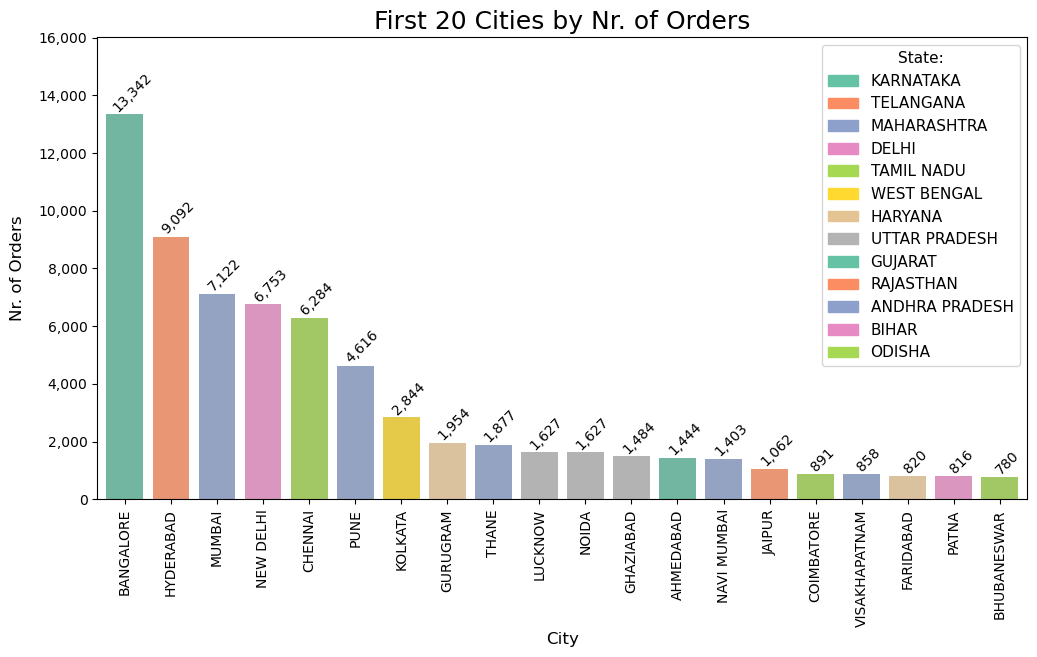

In [233]:
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

# Define the directory and create it if it doesn't exist
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define color palette
palette_colors = sns.color_palette('Set2', len(df_q4['ship_state'].unique()))
palette_dict = {state: color for state, color in zip(df_q4['ship_state'].unique(), palette_colors)}

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Use 'hue' parameter and pass palette
ax_q4 = sns.barplot(y='Order_ID', x='ship_city', hue='ship_state', palette=palette_dict, data=df_q4, dodge=False, legend=False)

plt.title('First 20 Cities by Nr. of Orders', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q4.yaxis.set_major_formatter(formatter)
ax_q4.yaxis.labelpad = _axis_label_pad

for bar in ax_q4.patches:
    height = bar.get_height()
    ax_q4.text(bar.get_x() + bar.get_width() * 0.7, height,
               '{:,.0f}'.format(height), ha='center', va='bottom', rotation=45)

plt.xticks(rotation=90)
plt.xlabel("City", weight=_fweight, fontsize=_axis_label_size)
plt.ylabel("Nr. of Orders", weight=_fweight, fontsize=_axis_label_size)

# Create custom legend
legend_entries = [mpatches.Patch(color=palette_dict[state], label=state) for state in df_q4['ship_state'].unique()]
plt.legend(handles=legend_entries, title='State:', title_fontsize=_legend_title_size-1, fontsize=_legend_content_size-1)

ax_q4.margins(0.01, 0.2)

# Save the plot
plt.savefig(os.path.join(output_dir, 'First_20_Cities_by_Nr_of_Orders.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [235]:
df_q5 = df.groupby(['ship_state','ship_city'])[['Amount','Qty']].sum()\
                                    .sort_values('Amount', ascending=False)\
                                     .head(20)\
                                    .reset_index()

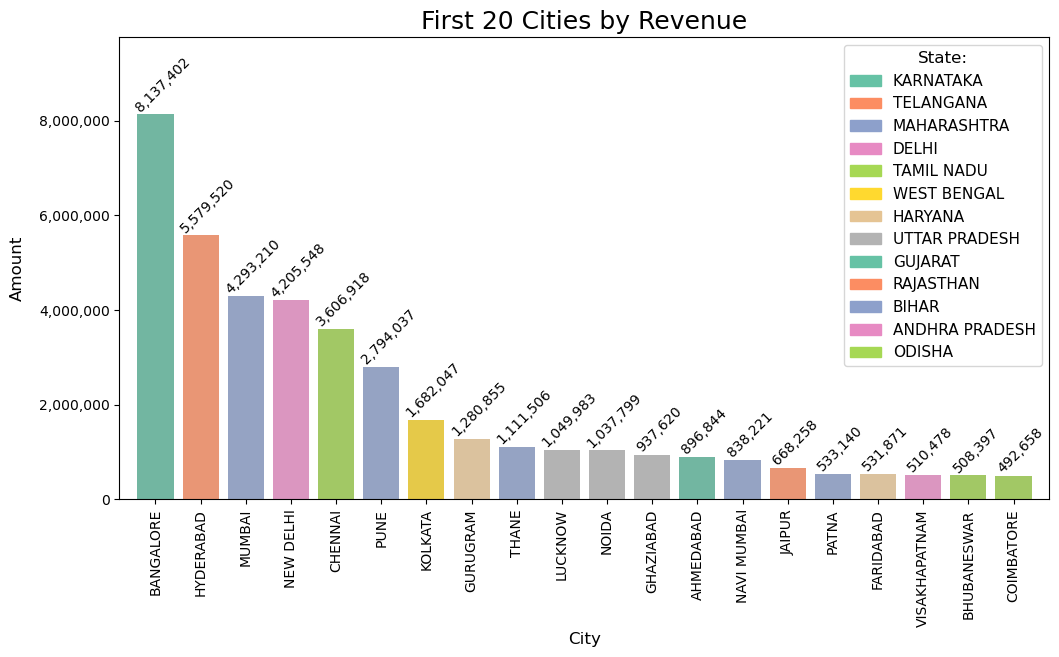

In [239]:
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

# Define the directory and create it if it doesn't exist
output_dir = 'img'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define color palette
palette_colors = sns.color_palette('Set2', len(df_q5['ship_state'].unique()))
palette_dict = {state: color for state, color in zip(df_q5['ship_state'].unique(), palette_colors)}

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Use 'hue' parameter and pass palette
ax_q5 = sns.barplot(y='Amount', x='ship_city', hue='ship_state', palette=palette_dict, data=df_q5, dodge=False, legend=False)

plt.title('First 20 Cities by Revenue', fontsize=_title_size)

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q5.yaxis.set_major_formatter(formatter)
ax_q5.yaxis.labelpad = _axis_label_pad

for bar in ax_q5.patches:
    height = bar.get_height()
    ax_q5.text(bar.get_x() + bar.get_width() * 0.7, height,
               '{:,.0f}'.format(height), ha='center', va='bottom', rotation=45)

plt.xticks(rotation=90)
plt.xlabel("City", weight=_fweight, fontsize=_axis_label_size)
plt.ylabel("Amount", weight=_fweight, fontsize=_axis_label_size)

# Create custom legend
legend_entries = [mpatches.Patch(color=palette_dict[state], label=state) for state in df_q5['ship_state'].unique()]
plt.legend(handles=legend_entries, title='State:', title_fontsize=_legend_title_size, fontsize=_legend_content_size-1)

ax_q5.margins(0.02, 0.2)

# Save the plot
plt.savefig(os.path.join(output_dir, 'First_20_Cities_by_Revenue.jpg'), dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [241]:
# How are the order volume and revenues distributed on the Fulfilment Method?
df_fulfilment_stats = pd.DataFrame(data= df.groupby(['Fulfilment'])['Order_ID'].count())
df_fulfilment_stats = df_fulfilment_stats.rename(columns={'Order_ID': 'Nr. of Orders'})
df_fulfilment_stats['% of Orders'] = [ x / (df_fulfilment_stats['Nr. of Orders'].sum()) for x in df_fulfilment_stats['Nr. of Orders'] ]
df_fulfilment_stats['Tot. Sales'] = df.groupby(['Fulfilment'])[['Amount']].sum()
df_fulfilment_stats['% of Tot. Sales'] = [ x / (df_fulfilment_stats['Tot. Sales'].sum()) for x in df_fulfilment_stats['Tot. Sales'] ]
df_fulfilment_stats

,Nr. of Orders,% of Orders,Tot. Sales,% of Tot. Sales
Fulfilment,,,,
Amazon,89692,0.695454,54319516.0,0.691176
Merchant,39277,0.304546,24270527.3,0.308824


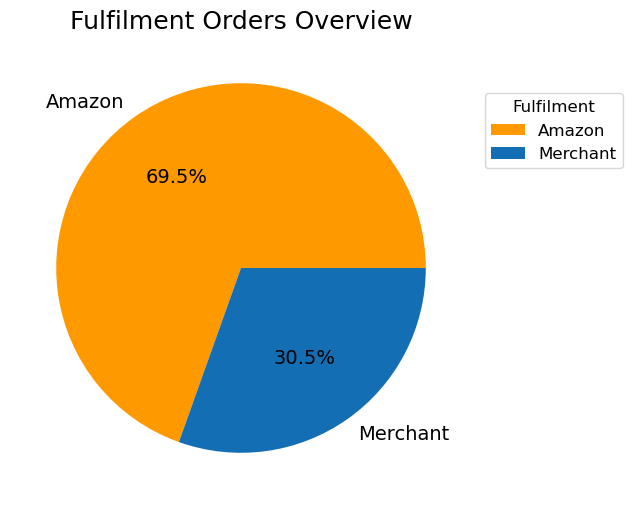

In [243]:
plt.figure(figsize = (8, 6))
fig_x2 = df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%", colors = ('#FF9900','#146EB4'), 
                                                  textprops={'fontsize': 14})
fig_x2.set(ylabel=None)
plt.legend(title = 'Fulfilment', title_fontsize= _legend_title_size, fontsize=_legend_content_size, bbox_to_anchor=(1,0.8),
                          bbox_transform=plt.gcf().transFigure)
plt.title('Fulfilment Orders Overview', fontsize= _title_size);
plt.savefig('img\\Fulfilment_Orders_Overview.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [245]:
df_shipment_stats = df.query("Courier_Status != 'Unknown'").groupby(['Courier_Status','Fulfilment'])[['Amount','Qty']].sum()\
                                    .sort_values('Amount', ascending=False)\
                                    .reset_index()

In [247]:
df_shipment_stats

,Courier_Status,Fulfilment,Amount,Qty
0,Shipped,Amazon,50329299.0,77858
1,Shipped,Merchant,20726730.0,32035
2,Unshipped,Amazon,3990217.0,6226
3,Unshipped,Merchant,353625.0,527
4,Cancelled,Amazon,0.0,0


In [249]:
df_shipment_stats['Nr. of Orders'] = df.groupby(['Courier_Status','Fulfilment'])[['Order_ID']].count()\
                                    .sort_values('Order_ID', ascending=False)\
                                    .reset_index()['Order_ID']

In [251]:
df_shipment_stats

,Courier_Status,Fulfilment,Amount,Qty,Nr. of Orders
0,Shipped,Amazon,50329299.0,77858,77603
1,Shipped,Merchant,20726730.0,32035,31881
2,Unshipped,Amazon,3990217.0,6226,6872
3,Unshipped,Merchant,353625.0,527,6157
4,Cancelled,Amazon,0.0,0,5932


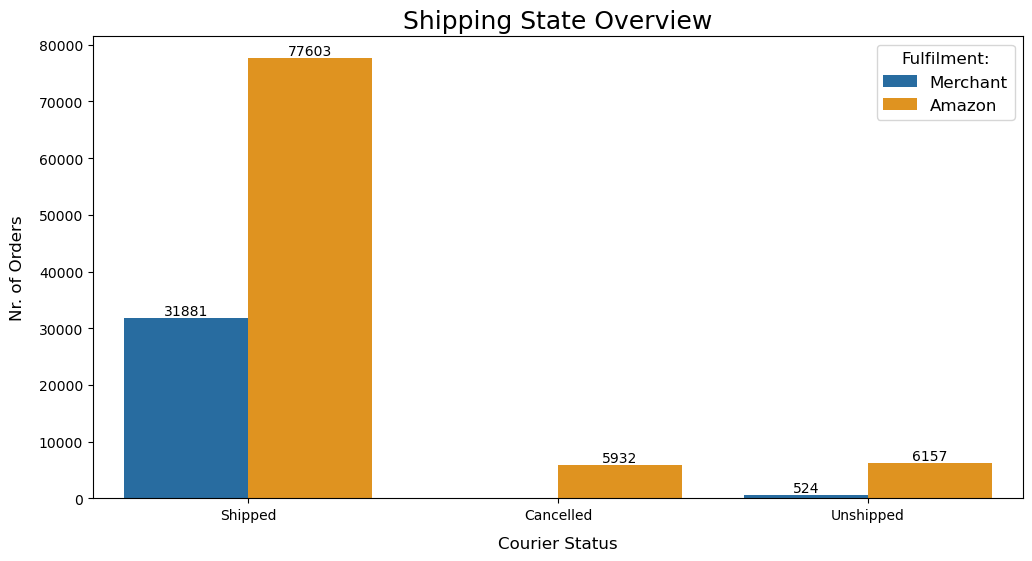

In [253]:
plt.figure(figsize = (12, 6))

ax6 = sns.countplot(x = 'Courier_Status', hue = 'Fulfilment', palette = ['#146EB4','#FF9900'], data = df.query("Courier_Status != 'Unknown'"));
plt.title('Shipping State Overview', fontsize=_title_size);
ax6.xaxis.labelpad = _axis_label_pad
ax6.yaxis.labelpad = _axis_label_pad

for i in ax6.containers:
    ax6.bar_label(i,)
plt.xlabel("Courier Status", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Nr. of Orders", weight = _fweight, fontsize= _axis_label_size)
plt.legend(title='Fulfilment:', title_fontsize= _legend_title_size, fontsize=_legend_content_size)
plt.savefig('img\\Shipping_State_Overview.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show;

In [255]:
df_q7 = df.groupby(['ship_city', 'Fulfilment'])[['Amount','Qty']].sum()\
                                    .sort_values('Amount', ascending=False)\
                                    .reset_index()

In [257]:
# 20 top cities
cities = []
i=0
while len(cities) < 20:
    if df_q7['ship_city'][i] not in cities:
        cities.append(df_q7['ship_city'][i])
    i+=1

# Amount by City, grouped by fulfilment 
fulfil_stat_amz =[]
fulfil_stat_merc =[]
for city in cities:
    fulfil_stat_amz.append(df_q7.query("ship_city == '"+city+"' and Fulfilment == 'Amazon'").values[0][2])
    fulfil_stat_merc.append(df_q7.query("ship_city == '"+city+"' and Fulfilment == 'Merchant'").values[0][2])

# Arrays for bar-plot
fulfil_stat_amz = np.array(fulfil_stat_amz)
fulfil_stat_merc = np.array(fulfil_stat_merc)
total= np.add(fulfil_stat_amz,fulfil_stat_merc)

fulfil_dict = {
        'Amazon': (fulfil_stat_amz, np.array([amz/tot for tot, amz in zip(total, fulfil_stat_amz)])),
        'Merchant': (fulfil_stat_merc, np.array([merc/tot for tot, merc in zip(total, fulfil_stat_merc)]))
}

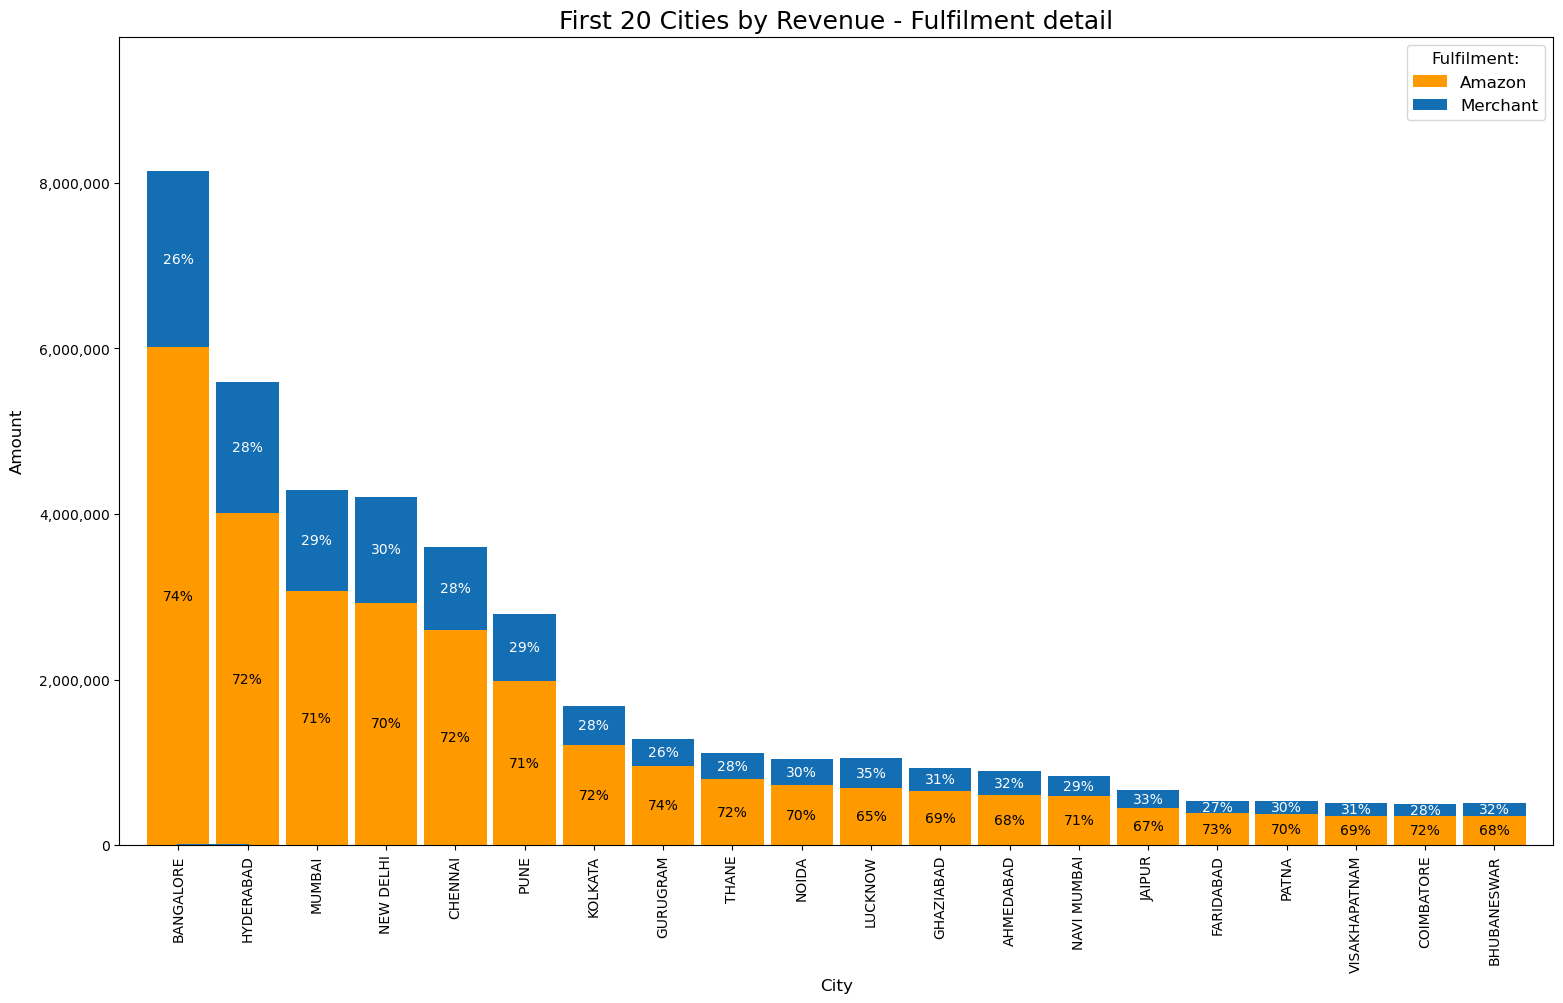

In [259]:
cities = tuple(cities)
ax_q7_width = 0.9
color_bars = ['#FF9900','#146EB4']
color_bar_labels= ['#000000','#FFFFFF']
fig_q7, ax_q7 = plt.subplots(1,1);
ax_q7.set_title('First 20 Cities by Revenue - Fulfilment detail', fontsize=_title_size)
fig_q7.set_size_inches(18.5, 10.5);

bottom = np.zeros(len(cities))
ax_q7.plot([1, 2])

for i, fulfil in enumerate(fulfil_dict.items()):
    p = ax_q7.bar(x= cities, height=fulfil[1][0], width=ax_q7_width, label=fulfil[0], bottom=bottom, color=color_bars[i])
    bottom += fulfil[1][0]
    ax_q7.bar_label(p, labels=[f"{x:.0%}" for x in fulfil[1][1]], label_type='center',color=color_bar_labels[i] )

formatter = ticker.StrMethodFormatter("{x:,.0f}")
ax_q7.yaxis.set_major_formatter(formatter)

ax_q7.yaxis.labelpad = _axis_label_pad


plt.xticks(rotation=90)
plt.xlabel("City", weight = _fweight, fontsize= _axis_label_size)
plt.ylabel("Amount", weight = _fweight, fontsize= _axis_label_size)

ax_q7.legend(title='Fulfilment:', title_fontsize= _legend_title_size, fontsize=_legend_content_size)
ax_q7.margins(0.02, 0.2)

plt.savefig('img\\First_20_Cities_by_Revenue_Fulfilment_hue.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show();